In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.feature_selection import mutual_info_classif

In [3]:
data = pd.read_csv("za_klasifikaciju.csv")

In [5]:
del data['Participant_id']

In [14]:
def get_mi(features, data, type_, feat_name):
    """
    INPUT
    ------
    features -> all features for one modality and one participant
    data -> classifiaction labels for all participants
    type_ -> str in ['Valence', 'Arousal', 'Dominance', 'Liking']
    feat_name -> name of modality

    RETURNS
    ------
    dict of feature names and their mutual info scores
    """

    #data_p = data.query("Participant_id == {}".format(p_id)).copy()

    if type_ == 'Valence':
        y = data['Valence'].copy()
    elif type_ == 'Arousal':
        y = data['Arousal'].copy()
    elif type_ == 'Dominance':
        y = data['Dominance'].copy()
    elif type_ == 'Liking':
        y = data['Liking'].copy()

    # Binary classification, 1-high, 0-low
    y[y < 4.5] = 0
    y[y >= 4.5] = 1

    m_i = mutual_info_classif(features, y)

    labels = np.array(list(features))

    inds = np.argsort(m_i)
    m_i = m_i[inds]
    labels = labels[inds]

    return {'name': feat_name, 'labels': labels, 'm_info': m_i}
    #plt.style.use('fivethirtyeight')
    #plt.rc('font', size=10)

    #plt.figure(figsize=(5, 10))
    #plt.barh(labels, m_i)
    #plt.title("Mutual information for {} features - {}".format(feat_name, type_))
    #plt.show()

In [37]:
plt.style.use('fivethirtyeight')
plt.rc('font', size=10)

# GSR

In [6]:
GSR_DIR = 'gsr_features/'

In [15]:
for i in range(1, 33):
    if i < 10:
        filename = "s0{}_gsr.csv".format(i)
    else:
        filename = "s{}_gsr.csv".format(i)

    features_i = pd.read_csv(os.path.join(GSR_DIR, filename), index_col=0)

    if i == 1:
        features = features_i.copy()
    else:
        features = features.append(features_i, ignore_index=True)

In [18]:
mi_gsr = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_gsr += [get_mi(features, data, t, 'GSR')]

# HRV

In [19]:
HRV_DIR = 'hrv_features/'

In [22]:
for i in range(1, 33):
    if i < 10:
        filename = "s0{}_hrv.csv".format(i)
    else:
        filename = "s{}_hrv.csv".format(i)

    features_i = pd.read_csv(os.path.join(HRV_DIR, filename), index_col=0)

    if i == 1:
        features = features_i.copy()
    else:
        features = features.append(features_i, ignore_index=True)

In [23]:
mi_hrv = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_hrv += [get_mi(features, data, t, 'HRV')]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# RESP

In [24]:
RESP_DIR = 'resp_features/'

In [25]:
for i in range(1, 33):
    if i < 10:
        filename = "s0{}_resp.csv".format(i)
    else:
        filename = "s{}_resp.csv".format(i)

    features_i = pd.read_csv(os.path.join(RESP_DIR, filename), index_col=0)

    if i == 1:
        features = features_i.copy()
    else:
        features = features.append(features_i, ignore_index=True)

In [29]:
mi_resp = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_resp += [get_mi(features, data, t, 'RESP')]

# TEMG

In [27]:
TEMG_DIR = 'temg_features/'

In [28]:
for i in range(1, 33):
    if i < 10:
        filename = "s0{}_temg.csv".format(i)
    else:
        filename = "s{}_temg.csv".format(i)

    features_i = pd.read_csv(os.path.join(TEMG_DIR, filename), index_col=0)

    if i == 1:
        features = features_i.copy()
    else:
        features = features.append(features_i, ignore_index=True)

In [30]:
mi_temg = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_temg += [get_mi(features, data, t, 'TEMG')]

# TEMP

In [40]:
TEMP_DIR = 'temp_features/'

In [41]:
for i in range(1, 33):
    if i < 10:
        filename = "s0{}_temp.csv".format(i)
    else:
        filename = "s{}_temp.csv".format(i)

    features_i = pd.read_csv(os.path.join(TEMP_DIR, filename), index_col=0)

    if i == 1:
        features = features_i.copy()
    else:
        features = features.append(features_i, ignore_index=True)

In [42]:
mi_temp = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_temp += [get_mi(features, data, t, 'TEMP')]

# ZEMG

In [43]:
ZEMG_DIR = 'zemg_features/'

In [44]:
for i in range(1, 33):
    if i < 10:
        filename = "s0{}_zemg.csv".format(i)
    else:
        filename = "s{}_zemg.csv".format(i)

    features_i = pd.read_csv(os.path.join(ZEMG_DIR, filename), index_col=0)

    if i == 1:
        features = features_i.copy()
    else:
        features = features.append(features_i, ignore_index=True)

In [45]:
mi_zemg = []

for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
    mi_zemg += [get_mi(features, data, t, 'ZEMG')]

# EEG

In [64]:
EEG_DIR = 'eeg_features/'
electrodes = os.listdir(EEG_DIR)

In [83]:
mi_eeg = []

for e in electrodes:

    for i in range(1, 33):
        if i < 10:
            filename = "s0{}_eegfeatures.csv".format(i)
        else:
            filename = "s{}_eegfeatures.csv".format(i)

        features_i = pd.read_csv(os.path.join(EEG_DIR, e, filename), index_col=0)

        if i == 1:
            features = features_i.copy()
        else:
            features = features.append(features_i, ignore_index=True)
    mi_e = []
    for t in ['Valence', 'Arousal', 'Dominance', 'Liking']:
        mi_e += [get_mi(features, data, t, e)]
    
    mi_eeg += [mi_e]

# Comparison

In [103]:
f_names = ['GSR', 'RESP', 'TEMG', 'TEMP', 'ZEMG']
f_names += electrodes

In [104]:
mi = [mi_gsr, mi_resp, mi_temg, mi_temp, mi_zemg]

mi += mi_eeg

In [105]:
valence = []
arousal = []
dominance = []
liking = []
val_feats = []
ar_feats = []
dom_feats = []
lik_feats = []

for i in range(len(mi)):
    valence += [mi[i][0]['m_info'][-1]]
    val_feats += [mi[i][0]['labels'][-1]]

    arousal += [mi[i][1]['m_info'][-1]]
    ar_feats += [mi[i][1]['labels'][-1]]

    dominance += [mi[i][2]['m_info'][-1]]
    dom_feats += [mi[i][2]['labels'][-1]]

    liking += [mi[i][3]['m_info'][-1]]
    lik_feats += [mi[i][3]['labels'][-1]]

In [106]:
valence = np.array(valence)
arousal = np.array(arousal)
dominance = np.array(dominance)
liking = np.array(liking)
f_names = np.array(f_names)
val_feats = np.array(val_feats)
ar_feats = np.array(ar_feats)
dom_feats = np.array(dom_feats)
lik_feats = np.array(lik_feats)

In [107]:
ind_v = np.argsort(valence)
valence = valence[ind_v]
names_v = f_names[ind_v]
val_feats = val_feats[ind_v]

ind_a = np.argsort(arousal)
arousal = arousal[ind_a]
names_a = f_names[ind_a]
ar_feats = ar_feats[ind_a]

ind_d = np.argsort(dominance)
dominance = dominance[ind_d]
names_d = f_names[ind_d]
dom_feats = dom_feats[ind_d]

ind_l = np.argsort(liking)
liking = liking[ind_l]
names_l = f_names[ind_l]
lik_feats = lik_feats[ind_l]

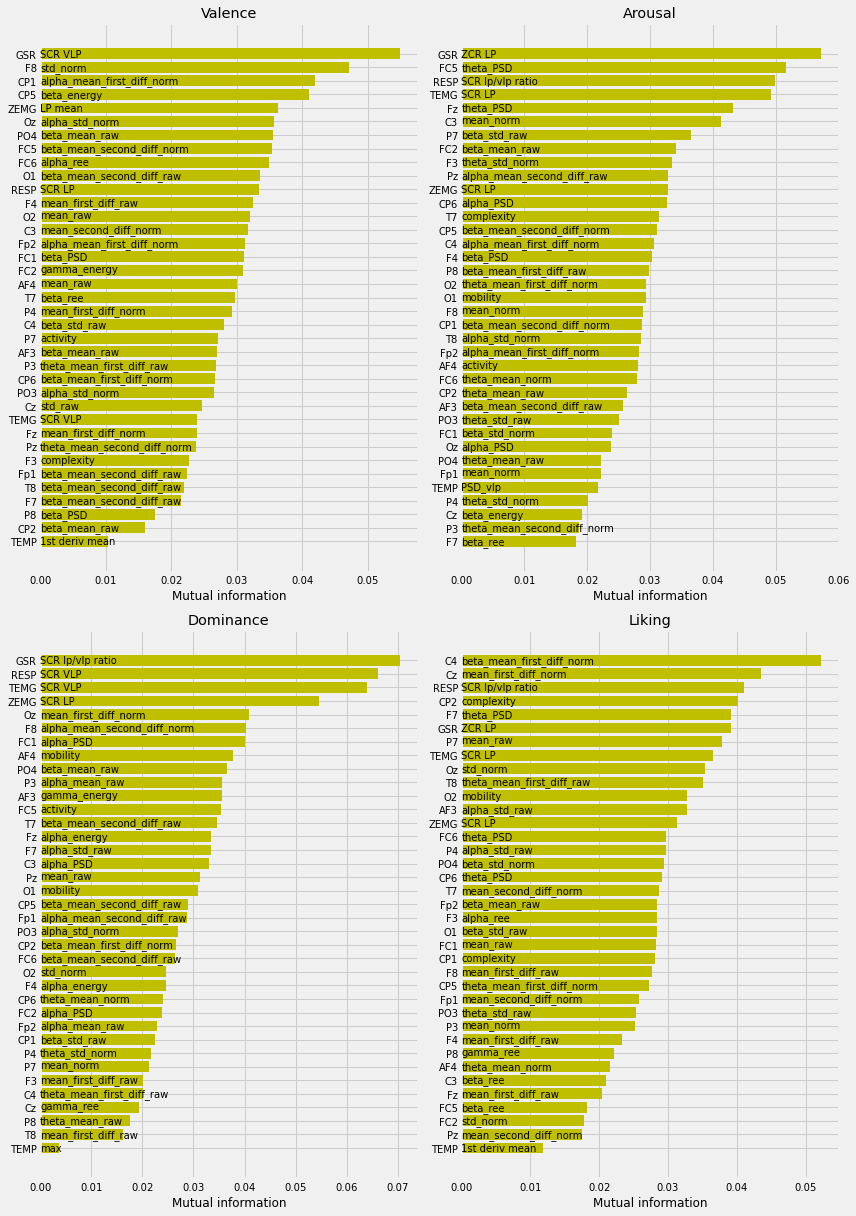

In [115]:
plt.figure(figsize=(12, 17))

plt.subplot(2, 2, 1)
plt.barh(names_v, valence, color='y')
for ii, nn in enumerate(val_feats):
    plt.text(s=nn, x=0, y=ii, color="k", verticalalignment="center", fontsize=10)
plt.title('Valence')
plt.xlabel('Mutual information')

plt.subplot(2, 2, 2)
plt.barh(names_a, arousal, color='y')
for ii, nn in enumerate(ar_feats):
    plt.text(s=nn, x=0, y=ii, color="k", verticalalignment="center", fontsize=10)
plt.title('Arousal')
plt.xlabel('Mutual information')

plt.subplot(2, 2, 3)
plt.barh(names_d, dominance, color='y')
for ii, nn in enumerate(dom_feats):
    plt.text(s=nn, x=0, y=ii, color="k", verticalalignment="center", fontsize=10)
plt.title('Dominance')
plt.xlabel('Mutual information')

plt.subplot(2, 2, 4)
plt.barh(names_l, liking, color='y')
for ii, nn in enumerate(lik_feats):
    plt.text(s=nn, x=0, y=ii, color="k", verticalalignment="center", fontsize=10)
plt.title('Liking')
plt.xlabel('Mutual information')

plt.tight_layout()

plt.show()